 # cost minimize
여러개의 hypothesis가 있다면 그 중에서 가장 적합한 hypothesis는 무엇이 될까를 알기 위해, 코스트를 사용하게 된다.<br> 
가설과 실제 데이터사이에 차이가 크면 적합하지 않은 가설<br>
차이가 적으면 적합한 가설이다.
<br>
출저: [cost란?](http://skagh.tistory.com/16)
 
 ## Simplified hypothesis
 #### \\(H(x) = Wx\\)
 #### \\(cost(W)\\) = \\(\frac{1}{m}\sum_{i=1}^{m} (W(x^i)-y^i)^2\\)
 
 x: [1, 2, 3] <br>
 y: [1, 2, 3] <br>
 
 ### cost minimize
 \\(W=1, cost(W)\\)=? = 0 <br>
 \\(W=0, cost(W)\\)=? = 4.67 <br>
 \\(W=2, cost(W)\\)=? = 4.67 <br>
 ![Cost Image](cost_w_and_w.png) 
 
 #### => cost가 최소인 지점 찾기
 <br>
 ### Gradient descent algorithm
 * Minimize cost Function
 * Gradient descent is user many minimization problems
 * For a given cost function, cost(W, b), it will find W, b to minimize cost
 * It cna be apllied to more general function: cost(w1, w2...)
 
 경사도를 따라서 한발자국씩 움직인다. <br>
 
 
 ### 경사도
 * 미분을 사용해서 경사도를 구한다 <br>
 
 \* **미분**은 주어진 그래프에서 경사도를 구한다.
 
 \\(cost(W, b)\\) = \\(\frac{1}{2m}\sum_{i=1}^{m} (H(x^i)-y^i)^2\\) <br>
 
 \\(cost(W)\\) = \\(\frac{1}{2m}\sum_{i=1}^{m} (W(x^i)-y^i)^2\\) <br>
 
 
 \\(W := W - \alpha\frac{\partial}{\partial W}cost(W)\\) <br>
 W를 W에서 코스트함수에서 <br>
 <br>
 \\(\alpha\\):  learning_rate <br><br>
 \\(\alpha\frac{\partial}{\partial W}cost(W)\\) :   learning_rate \\(*\\) cost함수를 \\(W\\)로 미분한것 <br><br>
 기울기가 +이면 W를 작은 값으로 움직이고, <br>
 기울기가 -이면 W를 큰 값으로 옮긴다.
 
 ### 미분을 하는 절차
 
 ### descent algorithm
 여러번 실행시키면서 \\(W\\)값이 변하는데, 여러번 실행시켜 변화된 \\(W\\)값이 cost를 minimize한 값이 된다.<br>
 <br>
  \\(W := W - \alpha\frac{1}{m}\sum_{i=1}^{m}(Wx^i-y^i)x^i\\) <br>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


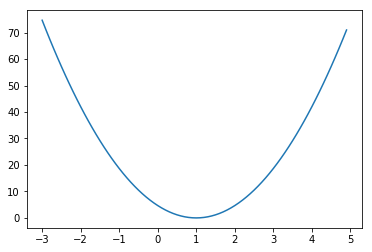

In [2]:
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)
hypothesis = X * W # X는 주어졌다.

cost = tf.reduce_mean(tf.square(hypothesis - Y))
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # varialble들을 초기화

W_val = [] # W의 값을 저장할 list
cost_val = [] #cost의 값을 저장할 list

for i in range(-30, 50): 
    feed_W = i * 0.1 #  W를 -3에서 5 간격에서 움직이고, 0.1만큼씩만 움직이겠다.
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    # feed_dict로 feed_W값을 넘긴다.
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
plt.plot(W_val, cost_val) # x축이 W, y축이 cost
plt.show() # 코스트 함수를 시각화



## Gradient descent
W = 1일때, 최적화가 되고, W = 1을 자동으로 찾는다. 
<br><br>
미분이라는 것은 한 점에서 기울기를 나타낸다. **W는 기울기를 따라 W가 최적화된 값을 찾아가는데**, 기울기가, + 그래프인지 -그래프인지에 따라 W는 다른 방향으로 움직이게 된다. <br>
* 기울기가 +이면 W는 마이나스 방향으로 움직인다. <br>
* 기울기가 -이면 W는 플러스 방향으로 움직인다. <br>

### W의 최적화
현재의 W에서 기울기를 빼준다.

In [3]:
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y)*X)
descent = W - learning_rate * gradient
update = W.assign(descent) # tesorflow에서는 =로 assign을 할 수 없다. 

AttributeError: 'Tensor' object has no attribute 'assign'